In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.shape

(614, 13)

# data cleaning and checking the missing vlaues

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# first we will the missing values in "loan Amount" annd "Creadit History" by mean and median respective variables

In [7]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [8]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

# lets the confirm if there are any missing value in LoanAmount & CreditHistory

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

# now lets the drop all missing values remaining

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
df.shape

(542, 13)

# Exploratory Data Analysis

In [13]:
# compparism between parameter in getting the Loan

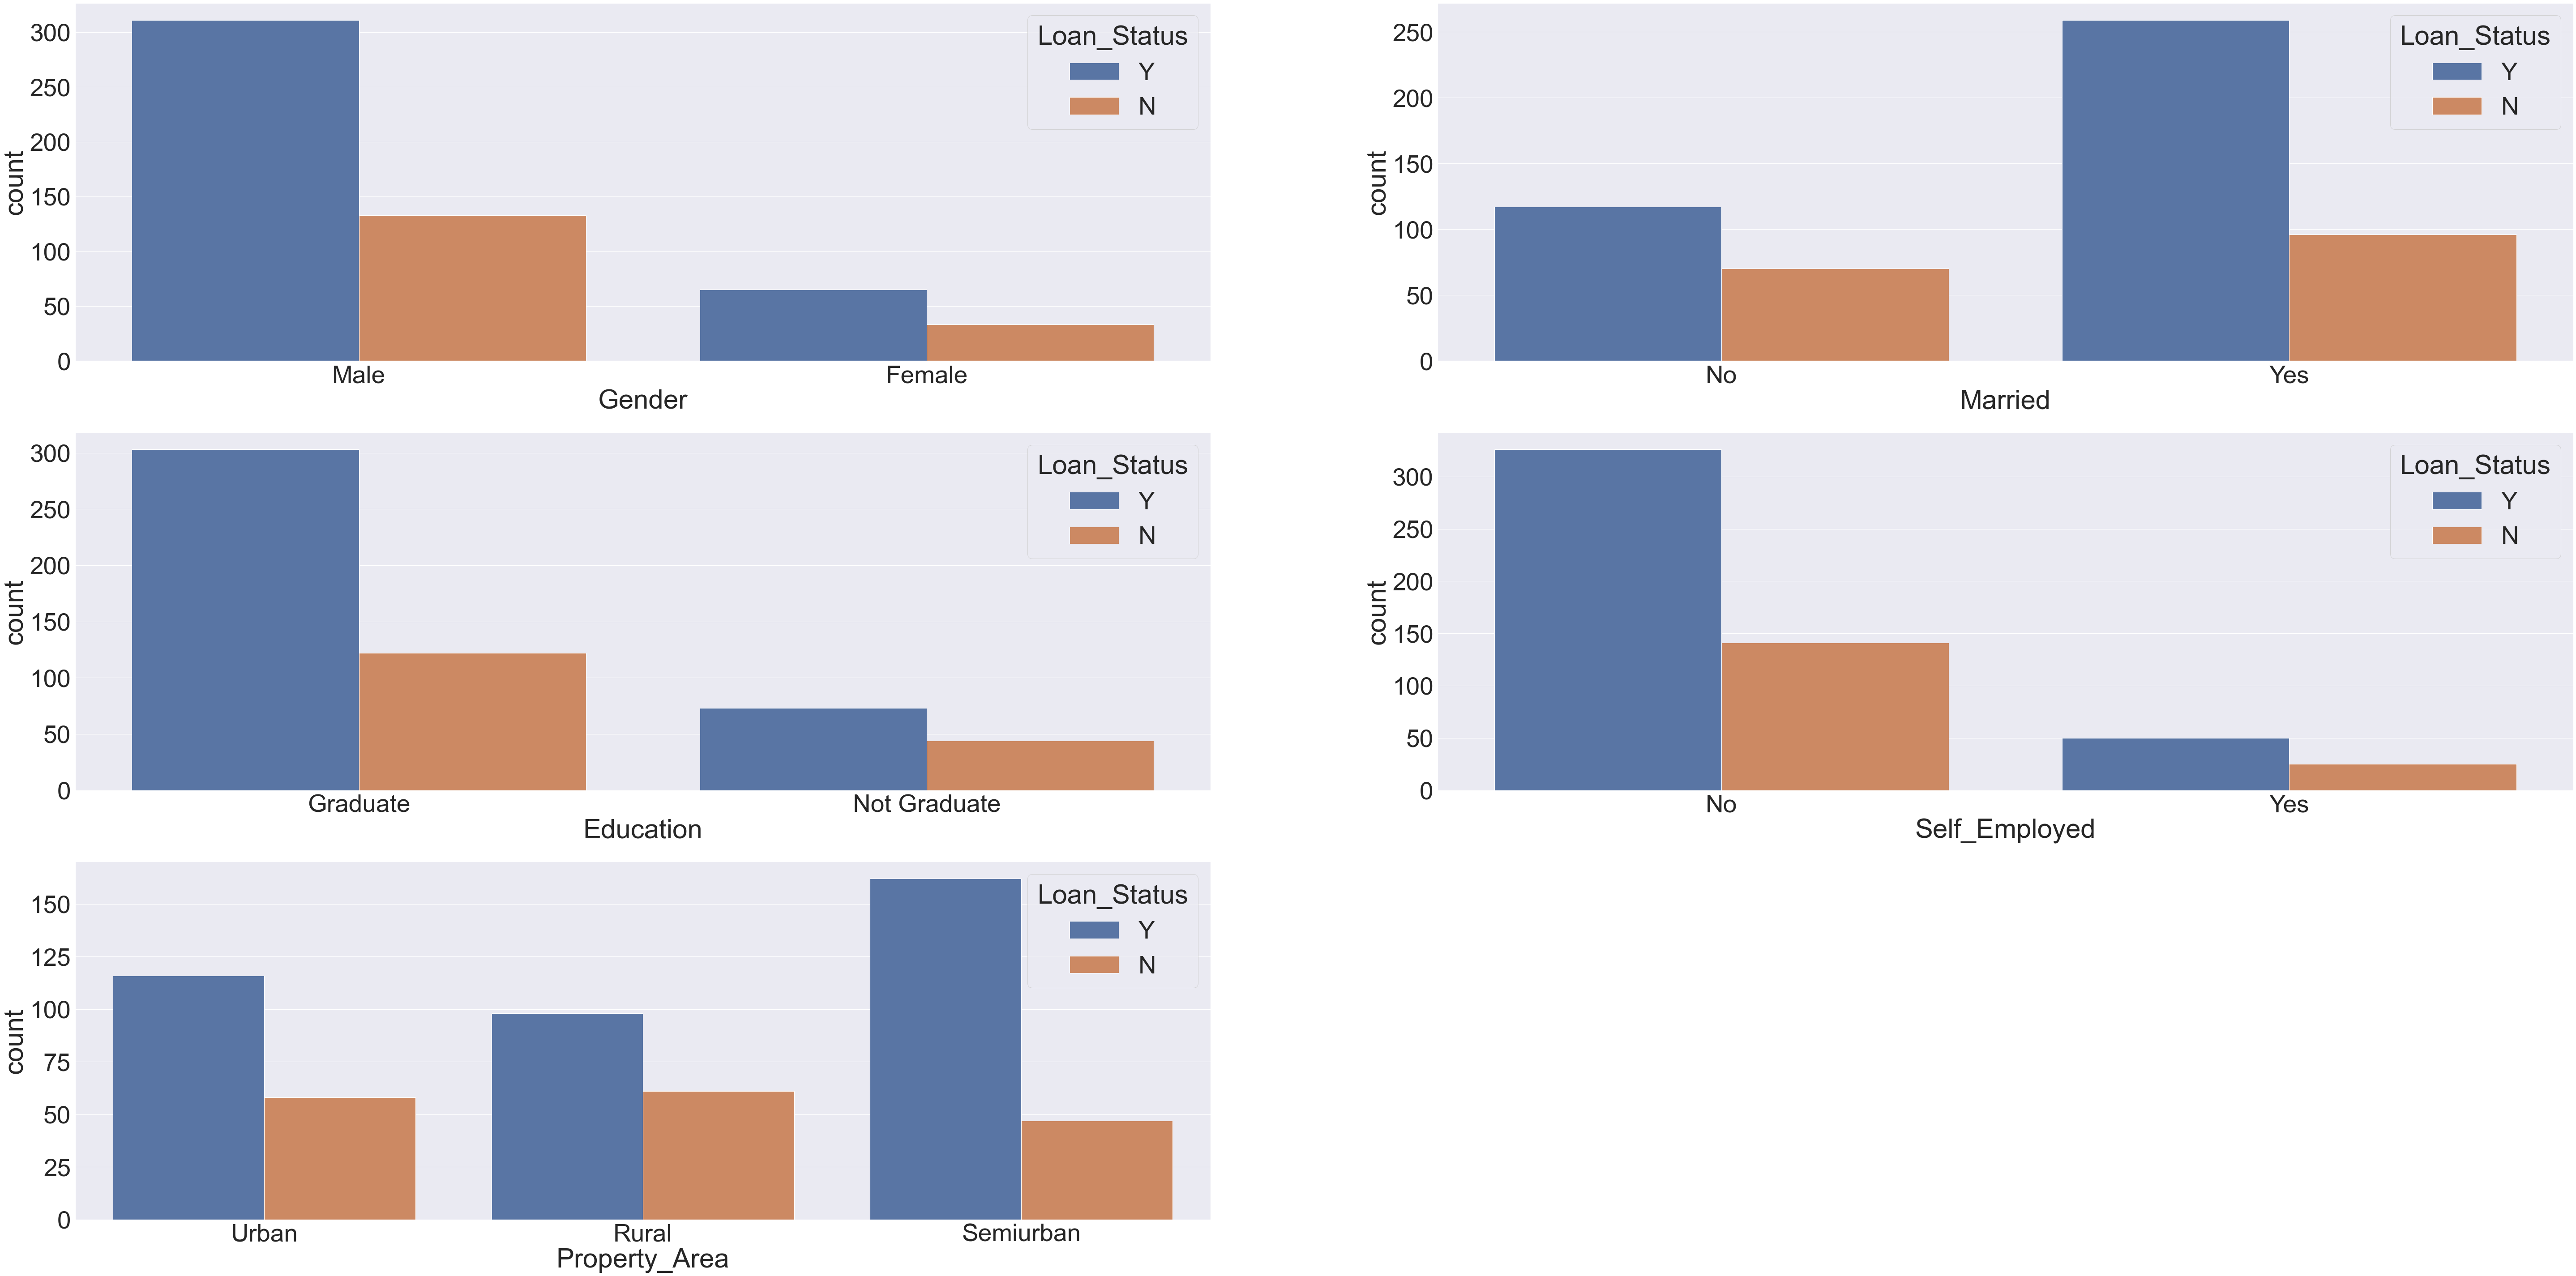

In [14]:
plt.figure(figsize=(100,50))
sns.set(font_scale=5)
plt.subplot(3,2,1)
sns.countplot(df['Gender'],hue=df['Loan_Status'])

plt.subplot(3,2,2)
sns.countplot(df['Married'],hue=df['Loan_Status'])

plt.subplot(3,2,3)
sns.countplot(df['Education'],hue=df['Loan_Status'])

plt.subplot(3,2,4)
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])

plt.subplot(3,2,5)
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])

plt.show()

In [15]:
# lets the replace the Variable value to numerical form and display the value counts
# the data in numerical form avoid disturbances in building the model.

In [16]:
# df['Loan_Status'] = df['Loan_Status'].replace('Y',1,inplace=True)
# df['Loan_Status'] = df['Loan_Status'].replace('N',1,inplace=True)
df.Loan_Status = df.Loan_Status.map({'Y':1,'N':0})
df.Loan_Status.value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

In [17]:
df.Gender = df.Gender.map({'Male':1,'Female':0})

In [18]:
df['Gender'].value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [19]:
df.Married = df.Married.map({'Yes':1,'No':0})

In [20]:
df.Married.value_counts()

1    355
0    187
Name: Married, dtype: int64

In [21]:
df.Dependents = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [22]:
df.Dependents.value_counts()

0    309
1     94
2     94
3     45
Name: Dependents, dtype: int64

In [23]:
df.Education = df.Education.map({'Graduate':1,'Not Graduate':0})

In [24]:
df.Education.value_counts()

1    425
0    117
Name: Education, dtype: int64

In [25]:
df.Self_Employed = df.Self_Employed.map({'Yes':1,'No':0})

In [26]:
df.Self_Employed.value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [27]:
df.Property_Area = df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [28]:
df.Property_Area.value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

In [29]:
df.LoanAmount.value_counts()

146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
250.000000     1
62.000000      1
85.000000      1
214.000000     1
436.000000     1
Name: LoanAmount, Length: 195, dtype: int64

In [30]:
df.Loan_Amount_Term.value_counts()

360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
240.0      3
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [31]:
df.Credit_History.value_counts()

1.0    468
0.0     74
Name: Credit_History, dtype: int64

In [32]:
# from the above figure, we can see that Credit History (Dependent Variables) has the maximum correlation with
# loan Status (Dependent Variable). which denote that the loan_satus is heavily dependent on the credit history

# Final Data Frame

In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


# importing  packages for classification Algorythm

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import metrics

In [51]:
x = df.iloc[1:542,1:12].values
y = df.iloc[1:542,12].values

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=0)

# Logistice Regression (LR)

In [53]:
# logistic regression is supervised leaning classification algorithm ussed to predict the probability of the target variable
# Mathematicaly a logistic regression model predict p(y=1) as a function of x. it is the one of simplest ML Algorithm that 
# can be used various classification problem such as a spam detection,Diabetes Prediction, Cancer Dection, Loan Prediction etc.

In [54]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [55]:
y_pred = model.predict(x_test)

In [56]:
model.score(x_test,y_test)

0.7522935779816514

In [57]:
y_test

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1],
      dtype=int64)

In [58]:
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [59]:
confusion_matrix(y_pred,y_test)

array([[16,  2],
       [25, 66]], dtype=int64)

In [60]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.39      0.89      0.54        18\n           1       0.97      0.73      0.83        91\n\n    accuracy                           0.75       109\n   macro avg       0.68      0.81      0.69       109\nweighted avg       0.87      0.75      0.78       109\n'

In [61]:
accuracy_score(y_pred,y_test)

0.7522935779816514

In [63]:
pd.DataFrame(np.c_[y_test,y_pred],columns=['actual','predict'])

,actual,predict
0,0,1
1,0,0
2,0,0
3,0,1
4,0,1
...,...,...
104,1,1
105,0,1
106,1,1
107,1,1


In [62]:
import joblib

In [64]:
joblib.dump(model,'loan_prediction.pkl')

['loan_prediction.pkl']

In [65]:
model = joblib.load('loan_prediction.pkl')

In [72]:
model.predict(x_test)

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [75]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [78]:
testing = x_test[-1]

In [79]:
testing

array([1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 3.073e+03,
       8.106e+03, 2.000e+02, 3.600e+02, 1.000e+00, 2.000e+00])

In [80]:
test = y_test[-1]

In [81]:
test

1

In [90]:
model.predict([testing])

array([1], dtype=int64)